In [1]:
from keras.layers import Input, Dense, Reshape, Dropout, Activation
from keras.layers import LSTM, Bidirectional, BatchNormalization, ZeroPadding2D
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import pygame
import copy
import pretty_midi

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import librosa
import mir_eval
import mir_eval.display
import IPython.display
import re
from mido  import MidiFile
from music21 import converter, instrument, note, chord, midi, stream, converter

import glob

In [4]:
from magenta.music.protobuf import music_pb2
import pretty_midi as pm
from magenta.music import note_sequence_io, midi_io
import six
#midi = pm.PrettyMIDI("rock.mid")
#mm.midi_to_sequence_proto(midi)

In [5]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plot
import sklearn
import seaborn as sns


import pandas_profiling

#Path for the groove dataset

MIDI_PATH = "data/groove/"
DATA_PATH = "data/groove/info.csv"

groove_df = pd.read_csv(DATA_PATH)
groove_df

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test
5,drummer1,drummer1/eval_session,drummer1/eval_session/5,funk/groove5,84,beat,4-4,drummer1/eval_session/5_funk-groove5_84_beat_4...,drummer1/eval_session/5_funk-groove5_84_beat_4...,45.687518,test
6,drummer1,drummer1/eval_session,drummer1/eval_session/6,hiphop/groove6,87,beat,4-4,drummer1/eval_session/6_hiphop-groove6_87_beat...,drummer1/eval_session/6_hiphop-groove6_87_beat...,44.119242,test
7,drummer1,drummer1/eval_session,drummer1/eval_session/7,pop/groove7,138,beat,4-4,drummer1/eval_session/7_pop-groove7_138_beat_4...,drummer1/eval_session/7_pop-groove7_138_beat_4...,27.706547,test
8,drummer1,drummer1/eval_session,drummer1/eval_session/8,rock/groove8,65,beat,4-4,drummer1/eval_session/8_rock-groove8_65_beat_4...,drummer1/eval_session/8_rock-groove8_65_beat_4...,59.067313,test
9,drummer1,drummer1/eval_session,drummer1/eval_session/9,soul/groove9,105,beat,4-4,drummer1/eval_session/9_soul-groove9_105_beat_...,drummer1/eval_session/9_soul-groove9_105_beat_...,36.540504,test


In [6]:
groove_df['style'].value_counts()

rock                         281
hiphop                        91
funk                          77
punk                          58
neworleans/funk               48
                            ... 
latin/venezuelan-merengue      1
latin/reggaeton                1
neworleans/shuffle             1
reggae/slow                    1
rock/rockabilly                1
Name: style, Length: 76, dtype: int64

In [7]:
#pandas_profiling.ProfileReport(groove_df)

In [8]:
groove_df = groove_df[groove_df.beat_type != 'fill']
short = groove_df[groove_df.duration <=30]
short.count()
#43 < 5 seconds
#158 < 30 seconds
#261 < 1 minute

drummer           158
session           158
id                158
style             158
bpm               158
beat_type         158
time_signature    158
midi_filename     158
audio_filename    148
duration          158
split             158
dtype: int64

In [9]:
groove_df['style'].value_counts()

rock                193
funk                 36
hiphop               30
jazz                 24
afrobeat             13
                   ... 
afrocuban/rhumba      1
middleeastern         1
rock/halftime         1
latin/bomba           1
rock/rockabilly       1
Name: style, Length: 76, dtype: int64

In [10]:
groove_df = groove_df[groove_df.audio_filename.isna() == False]
groove_df.count()

drummer           444
session           444
id                444
style             444
bpm               444
beat_type         444
time_signature    444
midi_filename     444
audio_filename    444
duration          444
split             444
dtype: int64

In [11]:
#sample = groove_df.iloc[0]
#midi_sample = MIDI_PATH + sample.midi_filename
#audio_sample = MIDI_PATH + sample.audio_filename
#pm = pm.PrettyMIDI(midi_sample)

In [12]:
groove_df['style'].value_counts()

rock                     171
hiphop                    28
funk                      28
jazz                      24
jazz/swing                11
                        ... 
middleeastern              1
latin/brazilian-frevo      1
rock/halftime              1
latin/bomba                1
rock/rockabilly            1
Name: style, Length: 74, dtype: int64

In [13]:
groove_df['style'].value_counts()

rock                     171
hiphop                    28
funk                      28
jazz                      24
jazz/swing                11
                        ... 
middleeastern              1
latin/brazilian-frevo      1
rock/halftime              1
latin/bomba                1
rock/rockabilly            1
Name: style, Length: 74, dtype: int64

In [14]:
#pandas_profiling.ProfileReport(groove_df)

In [15]:
single_styles = groove_df[groove_df['duration'] <= 20]
#single_styles

In [16]:
styles = groove_df['style'].value_counts()
style_durations = pd.DataFrame(columns=['style','max','min','sum'])
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    style_durations = style_durations.append({'style': s, 'max': style_df['duration'].max(), 
                                             'min': style_df['duration'].min(), 'sum': style_df['duration'].sum()},
                                             ignore_index=True)
#print(style_df.count())
style_durations.sort_values(by=['sum'], ascending='True')

,style,max,min,sum
52,latin/merengue,18.304597,18.304597,18.304597
55,jazz/klezmer,37.595410,37.595410,37.595410
56,latin/venezuelan-sangueo,80.779648,80.779648,80.779648
61,latin/reggaeton,87.784634,87.784634,87.784634
65,jazz/fast,105.048858,105.048858,105.048858
23,pop/groove7,27.824300,27.694771,110.926730
18,funk/groove1,27.872308,27.706547,111.148651
62,reggae/slow,112.148438,112.148438,112.148438
67,neworleans/chacha,115.856863,115.856863,115.856863
59,funk/rock,119.625016,119.625016,119.625016


In [17]:
#Method 1: Add the multi-style to the first substyle.
test_df = groove_df
for s in styles.index:
    if '/' in s:
        print(s)
        style_a,style_b = s.split('/')
        print(s.split('/'))
        if style_a in styles.index:
            print(style_a)
            split_style = groove_df.query('style=="'+s+'"')
            test_df = test_df.replace({'style':{s:style_a}})
            #groove_df = groove_df.replace({'style':{s:style_a}})
        if style_b in styles.index:
            print(style_b)
            split_style = groove_df.query('style=="'+s+'"')
            test_df = test_df.replace({'style':{s:style_b}})
            groove_df = groove_df.replace({'style':{s:style_b}})
#groove_df['style'].value_counts()
#test_df['style'].value_counts()

jazz/swing
['jazz', 'swing']
jazz
neworleans/funk
['neworleans', 'funk']
funk
latin/brazilian-samba
['latin', 'brazilian-samba']
latin
soul/groove9
['soul', 'groove9']
soul
funk/groove2
['funk', 'groove2']
funk
hiphop/groove6
['hiphop', 'groove6']
hiphop
soul/motown
['soul', 'motown']
soul
soul/groove10
['soul', 'groove10']
soul
jazz/fusion
['jazz', 'fusion']
jazz
rock/groove8
['rock', 'groove8']
rock
funk/groove1
['funk', 'groove1']
funk
soul/groove4
['soul', 'groove4']
soul
funk/groove5
['funk', 'groove5']
funk
soul/groove3
['soul', 'groove3']
soul
blues/shuffle
['blues', 'shuffle']
pop/groove7
['pop', 'groove7']
pop
latin/brazilian
['latin', 'brazilian']
latin
dance/disco
['dance', 'disco']
rock/prog
['rock', 'prog']
rock
neworleans/secondline
['neworleans', 'secondline']
latin/brazilian-songo
['latin', 'brazilian-songo']
latin
pop/soft
['pop', 'soft']
pop
latin/brazilian-sambareggae
['latin', 'brazilian-sambareggae']
latin
latin/brazilian-ijexa
['latin', 'brazilian-ijexa']
latin
ro

In [18]:
#styles = groove_df['style'].value_counts()
styles = test_df['style'].value_counts()
style_durations = pd.DataFrame(columns=['style','max','min','sum'])
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    style_durations = style_durations.append({'style': s, 'max': style_df['duration'].max(), 
                                             'min': style_df['duration'].min(), 'sum': int(style_df['duration'].sum())},
                                             ignore_index=True)
#print(style_df.count())
#style_durations.sort_values(by=['sum'], ascending='True')



In [19]:
styles_removed = style_durations[style_durations['sum'] < 100]
#print(styles_removed)
#groove_df = groove_df[groove_df.style]

In [20]:
#Generates MIDI list for each genre
genre_midi_list = {}
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    genre_midi_list[s] = style_df.midi_filename.tolist()


In [21]:
r_len = int(len(genre_midi_list['rock'])/2)
#print(genre_midi_list['rock'])
#r_list = genre_midi_list['rock'][:r_len]
#r_list = ["drummer1/session2/6_rock_102_beat_3-4.mid"]
r_list = groove_df.midi_filename.tolist()
#r_list = genre_midi_list['rock']

In [22]:

n_x = 79
max_T_x = 1000
sequence_length = 20
T_y_generated = 200

In [23]:
import os
def get_notes(midi_list):
    notes = []
    for file in midi_list:
        if os.path.exists(MIDI_PATH + file):
            midi = pretty_midi.PrettyMIDI(MIDI_PATH + file)
            for instrument in midi.instruments:
                if instrument.is_drum:
                    for note in instrument.notes:
                        notes.append((note.pitch))
    return notes

In [25]:
def prepare_sequences(notes, n_vocab):
    sequence_length = 100
    print("\n**Preparing sequences for training**")
    pitchnames = sorted(set(i for i in notes)) # list of unique chords and notes
    #n_vocab = len(pitchnames)
    print("Pitchnames (unique notes/chords from 'notes') at length {}: {}".format(len(pitchnames),pitchnames))
    # enumerate pitchnames into dictionary embedding
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
    print("Note to integer embedding created at length {}".format(len(note_to_int)))

    network_input = []
    network_output = []

    # i equals total notes less declared sequence length of LSTM (ie 5000 - 100)
    # sequence input for each i is list of notes i to end of sequence length (ie 0-100 for i = 0)
    # sequence output for each i is single note at i + sequence length (ie 100 for i = 0)
    for i in range(0, len(notes) - sequence_length,1):
        sequence_in = notes[i:i + sequence_length] # 100
        sequence_out = notes[i + sequence_length] # 1

        # enumerate notes and chord sequences with note_to_int enumerated encoding
        # network input/output is a list of encoded notes and chords based on note_to_int encoding
        # if 100 unique notes/chords, the encoding will be between 0-100
        input_add = [note_to_int[char] for char in sequence_in]
        network_input.append(input_add) # sequence length
        output_add = note_to_int[sequence_out]
        network_output.append(output_add) # single note

    print("Network input and output created with (pre-transform) lengths {} and {}".format(len(network_input),len(network_output)))
    # print("Network input and output first list items: {} and {}".format(network_input[0],network_output[0]))
    # print("Network input list item length: {}".format(len(network_input[0])))
    n_patterns = len(network_input) # notes less sequence length
    print("Lengths. N Vocab: {} N Patterns: {} Pitchnames: {}".format(n_vocab,n_patterns, len(pitchnames)))
    print("\n**Reshaping for training**")

    # convert network input/output from lists to numpy arrays
    # reshape input to (notes less sequence length, sequence length)
    # reshape output to (notes less sequence length, unique notes/chords)
    network_input_r = np.reshape(network_input, (n_patterns, sequence_length, 1))
    
    #Normalize input
    network_input_r = (network_input_r - (float(n_vocab) / 2)) / (float(n_vocab) / 2)
    
    network_output_r = np_utils.to_categorical(network_output)

    print("Reshaping network input to (notes - sequence length, sequence length) {}".format(network_input_r.shape))
    print("Reshaping network output to (notes - sequence length, unique notes) {}".format(network_output_r.shape))
    return network_input_r, network_output_r, n_patterns, n_vocab, pitchnames

In [106]:
notes = get_notes(r_list)
n_vocab = len(set(notes))
print (set(notes))
print (n_vocab)
#network_input,network_output = prepare_sequences(notes, n_vocab)
#print (network_input,network_output )

{22, 26, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59}
22


In [27]:
#print (set(notes))

In [28]:
network_input, network_output, n_patterns, n_vocab, pitchnames = prepare_sequences(notes, n_vocab)


**Preparing sequences for training**
Pitchnames (unique notes/chords from 'notes') at length 22: [22, 26, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59]
Note to integer embedding created at length 22
Network input and output created with (pre-transform) lengths 320432 and 320432
Lengths. N Vocab: 22 N Patterns: 320432 Pitchnames: 22

**Reshaping for training**
Reshaping network input to (notes - sequence length, sequence length) (320432, 100, 1)
Reshaping network output to (notes - sequence length, unique notes) (320432, 22)


In [74]:
network_output[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

{55: 1887, 51: 31462, 36: 64057, 44: 36130, 38: 73817, 40: 16475, 37: 8889, 52: 967, 43: 8224, 53: 4932, 22: 22552, 42: 26540, 26: 6789, 48: 7757, 46: 2138, 59: 1425, 50: 1298, 45: 2565, 47: 1119, 58: 851, 49: 375, 57: 283}


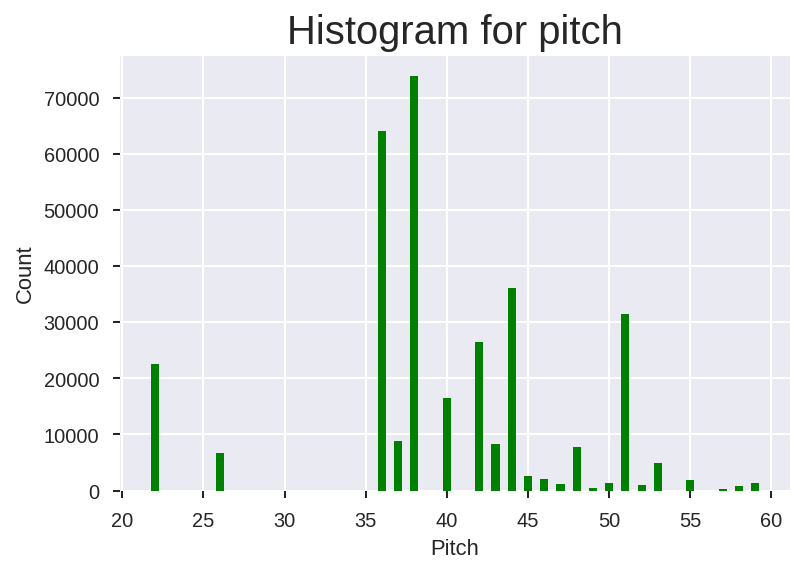

In [29]:
#importing library
from collections import Counter
freq = dict(Counter(notes))
print (freq)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#set figure
f, ax = plt.subplots(1,1)

#plt.figure(figsize=(15,5))
plt.bar(freq.keys(), freq.values(), width=.5, color='g')
#set title & axis titles
ax.set_title('Histogram for pitch', fontsize=20)
ax.set_xlabel('Pitch')
ax.set_ylabel('Count')
plt.show()

In [30]:
class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (self.seq_length, 1)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequence
        
        z = Input(shape=(self.latent_dim,))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        

    def build_discriminator(self):

        model = Sequential()
        model.add(LSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(LSTM(512)))
        #model.add(Dropout(0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.2))
        model.add(Dense(256))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)
      
    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.2))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.2))
        model.add(Dense(np.prod(self.seq_shape), activation='tanh'))
        model.add(Reshape(self.seq_shape))
        model.add(Dropout(0.2))
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        seq = model(noise)

        return Model(noise, seq)

    def train(self, genre_dataset, epochs, batch_size=128, sample_interval=50):

        # Load and convert the data
        notes = get_notes(genre_dataset)
        n_vocab = len(set(notes))
        X_train, y_train, n_patterns, n_vocab, pitchnames = prepare_sequences(notes, n_vocab)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        # Training the model
        for epoch in range(epochs):

            # Training the discriminator
            # Select a random batch of note sequences
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_seqs = X_train[idx]


            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Generate a batch of new note sequences
            
            gen_seqs = self.generator.predict(noise)
            
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
            d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            #  Training the Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            
            # Train the generator (to have the discriminator label samples as real)
            g_loss = self.combined.train_on_batch(noise, real)

            # Print the progress and save into loss lists
            if epoch % sample_interval == 0:
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
                self.disc_loss.append(d_loss[0])
                self.gen_loss.append(g_loss)
        #print (notes)
        
        #self.generate(notes)
        #self.plot_loss()
        
    def plot_loss(self):
        plt.plot(self.disc_loss, c='red')
        plt.plot(self.gen_loss, c='blue')
        plt.title("GAN Loss per Epoch")
        plt.legend(['Discriminator', 'Generator'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)
        plt.close()

In [33]:
gan = GAN(rows=100)
gan.train(genre_dataset=r_list, epochs=1000, batch_size=32, sample_interval=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 512)          1052672   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)              

/home/bikash/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.690857, acc.: 54.69%] [G loss: 0.686270]


/home/bikash/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.665613, acc.: 75.00%] [G loss: 0.679033]
2 [D loss: 0.631953, acc.: 78.12%] [G loss: 0.683757]
3 [D loss: 0.572588, acc.: 79.69%] [G loss: 0.677993]
4 [D loss: 0.441358, acc.: 76.56%] [G loss: 0.772028]
5 [D loss: 0.372886, acc.: 79.69%] [G loss: 0.903260]
6 [D loss: 0.317842, acc.: 90.62%] [G loss: 1.709514]
7 [D loss: 0.169899, acc.: 96.88%] [G loss: 2.657609]
8 [D loss: 0.107925, acc.: 98.44%] [G loss: 5.470104]
9 [D loss: 0.490663, acc.: 85.94%] [G loss: 3.189277]
10 [D loss: 0.252274, acc.: 93.75%] [G loss: 2.281451]
11 [D loss: 0.258440, acc.: 92.19%] [G loss: 6.816862]
12 [D loss: 0.180105, acc.: 93.75%] [G loss: 8.543459]
13 [D loss: 0.548480, acc.: 90.62%] [G loss: 2.428455]
14 [D loss: 0.284367, acc.: 79.69%] [G loss: 6.313411]
15 [D loss: 0.536244, acc.: 92.19%] [G loss: 1.416257]
16 [D loss: 0.309320, acc.: 92.19%] [G loss: 1.469007]
17 [D loss: 0.282150, acc.: 89.06%] [G loss: 1.529505]
18 [D loss: 0.299727, acc.: 85.94%] [G loss: 1.860054]
19 [D loss: 0.23859

150 [D loss: 0.428981, acc.: 82.81%] [G loss: 1.672131]
151 [D loss: 0.450447, acc.: 76.56%] [G loss: 1.906249]
152 [D loss: 0.479557, acc.: 71.88%] [G loss: 1.756033]
153 [D loss: 0.306840, acc.: 82.81%] [G loss: 2.169097]
154 [D loss: 0.310927, acc.: 85.94%] [G loss: 2.712596]
155 [D loss: 0.304752, acc.: 82.81%] [G loss: 2.901922]
156 [D loss: 0.339064, acc.: 85.94%] [G loss: 2.523605]
157 [D loss: 0.479100, acc.: 75.00%] [G loss: 1.948908]
158 [D loss: 0.349691, acc.: 82.81%] [G loss: 2.129683]
159 [D loss: 0.394493, acc.: 76.56%] [G loss: 2.112798]
160 [D loss: 0.378166, acc.: 84.38%] [G loss: 1.787881]
161 [D loss: 0.419957, acc.: 81.25%] [G loss: 2.416237]
162 [D loss: 0.365414, acc.: 85.94%] [G loss: 2.627378]
163 [D loss: 0.425251, acc.: 82.81%] [G loss: 2.252391]
164 [D loss: 0.430044, acc.: 79.69%] [G loss: 2.587986]
165 [D loss: 0.380262, acc.: 81.25%] [G loss: 4.350832]
166 [D loss: 0.891406, acc.: 73.44%] [G loss: 1.415754]
167 [D loss: 0.696095, acc.: 59.38%] [G loss: 1.

297 [D loss: 0.564818, acc.: 68.75%] [G loss: 1.042159]
298 [D loss: 0.616812, acc.: 57.81%] [G loss: 1.162733]
299 [D loss: 0.504845, acc.: 76.56%] [G loss: 1.285303]
300 [D loss: 0.540074, acc.: 68.75%] [G loss: 1.446427]
301 [D loss: 0.542535, acc.: 65.62%] [G loss: 1.495623]
302 [D loss: 0.513422, acc.: 71.88%] [G loss: 1.897787]
303 [D loss: 0.475991, acc.: 78.12%] [G loss: 2.452563]
304 [D loss: 0.549846, acc.: 73.44%] [G loss: 1.882917]
305 [D loss: 0.463673, acc.: 73.44%] [G loss: 2.022353]
306 [D loss: 0.544292, acc.: 71.88%] [G loss: 2.276313]
307 [D loss: 0.543960, acc.: 76.56%] [G loss: 1.777796]
308 [D loss: 0.464990, acc.: 73.44%] [G loss: 1.660505]
309 [D loss: 0.469758, acc.: 78.12%] [G loss: 2.221709]
310 [D loss: 0.408772, acc.: 78.12%] [G loss: 2.397292]
311 [D loss: 0.496733, acc.: 70.31%] [G loss: 2.739348]
312 [D loss: 0.541750, acc.: 70.31%] [G loss: 2.765626]
313 [D loss: 0.529834, acc.: 70.31%] [G loss: 2.397512]
314 [D loss: 0.463260, acc.: 79.69%] [G loss: 2.

444 [D loss: 0.580942, acc.: 73.44%] [G loss: 2.812035]
445 [D loss: 0.582403, acc.: 68.75%] [G loss: 2.488508]
446 [D loss: 0.586514, acc.: 68.75%] [G loss: 2.351886]
447 [D loss: 0.550971, acc.: 79.69%] [G loss: 2.117606]
448 [D loss: 0.500318, acc.: 84.38%] [G loss: 2.335525]
449 [D loss: 0.427751, acc.: 85.94%] [G loss: 2.585984]
450 [D loss: 0.464353, acc.: 73.44%] [G loss: 2.630817]
451 [D loss: 0.532588, acc.: 70.31%] [G loss: 2.857901]
452 [D loss: 0.636173, acc.: 68.75%] [G loss: 2.580019]
453 [D loss: 0.536754, acc.: 76.56%] [G loss: 2.513238]
454 [D loss: 0.417004, acc.: 81.25%] [G loss: 2.871144]
455 [D loss: 0.433147, acc.: 85.94%] [G loss: 2.664255]
456 [D loss: 0.711782, acc.: 65.62%] [G loss: 1.810963]
457 [D loss: 0.506175, acc.: 76.56%] [G loss: 1.796515]
458 [D loss: 0.361736, acc.: 89.06%] [G loss: 2.177590]
459 [D loss: 0.499228, acc.: 75.00%] [G loss: 2.317396]
460 [D loss: 0.601479, acc.: 67.19%] [G loss: 2.409701]
461 [D loss: 0.551655, acc.: 75.00%] [G loss: 2.

591 [D loss: 0.546073, acc.: 71.88%] [G loss: 1.751212]
592 [D loss: 0.525025, acc.: 73.44%] [G loss: 1.694373]
593 [D loss: 0.434549, acc.: 81.25%] [G loss: 2.026993]
594 [D loss: 0.483181, acc.: 76.56%] [G loss: 2.046337]
595 [D loss: 0.503462, acc.: 70.31%] [G loss: 1.956846]
596 [D loss: 0.384449, acc.: 82.81%] [G loss: 2.041991]
597 [D loss: 0.551926, acc.: 65.62%] [G loss: 2.196992]
598 [D loss: 0.428465, acc.: 85.94%] [G loss: 1.976275]
599 [D loss: 0.487667, acc.: 76.56%] [G loss: 2.140642]
600 [D loss: 0.328168, acc.: 82.81%] [G loss: 2.434316]
601 [D loss: 0.618100, acc.: 67.19%] [G loss: 2.189081]
602 [D loss: 0.357726, acc.: 84.38%] [G loss: 2.340051]
603 [D loss: 0.561416, acc.: 68.75%] [G loss: 2.413345]
604 [D loss: 0.503764, acc.: 75.00%] [G loss: 2.190118]
605 [D loss: 0.641937, acc.: 67.19%] [G loss: 1.946596]
606 [D loss: 0.488052, acc.: 75.00%] [G loss: 1.931550]
607 [D loss: 0.500055, acc.: 75.00%] [G loss: 1.973706]
608 [D loss: 0.410408, acc.: 78.12%] [G loss: 2.

738 [D loss: 0.305973, acc.: 82.81%] [G loss: 2.489233]
739 [D loss: 0.261384, acc.: 89.06%] [G loss: 2.661849]
740 [D loss: 0.526372, acc.: 79.69%] [G loss: 2.423842]
741 [D loss: 0.408640, acc.: 78.12%] [G loss: 2.614597]
742 [D loss: 0.205232, acc.: 92.19%] [G loss: 3.059030]
743 [D loss: 0.335937, acc.: 90.62%] [G loss: 2.712433]
744 [D loss: 0.499389, acc.: 78.12%] [G loss: 2.943605]
745 [D loss: 0.351203, acc.: 85.94%] [G loss: 2.983265]
746 [D loss: 0.502854, acc.: 76.56%] [G loss: 2.539723]
747 [D loss: 0.251245, acc.: 92.19%] [G loss: 2.763845]
748 [D loss: 0.576221, acc.: 73.44%] [G loss: 2.421364]
749 [D loss: 0.410853, acc.: 82.81%] [G loss: 2.167610]
750 [D loss: 0.450911, acc.: 79.69%] [G loss: 2.314857]
751 [D loss: 0.299108, acc.: 89.06%] [G loss: 2.302111]
752 [D loss: 0.346201, acc.: 84.38%] [G loss: 2.639769]
753 [D loss: 0.325677, acc.: 89.06%] [G loss: 2.944853]
754 [D loss: 0.373332, acc.: 82.81%] [G loss: 2.922869]
755 [D loss: 0.266473, acc.: 93.75%] [G loss: 2.

885 [D loss: 0.390253, acc.: 82.81%] [G loss: 2.903488]
886 [D loss: 0.267658, acc.: 90.62%] [G loss: 2.797244]
887 [D loss: 0.372569, acc.: 89.06%] [G loss: 2.685053]
888 [D loss: 0.166863, acc.: 95.31%] [G loss: 2.838005]
889 [D loss: 0.283458, acc.: 85.94%] [G loss: 3.060669]
890 [D loss: 0.413740, acc.: 79.69%] [G loss: 3.124599]
891 [D loss: 0.236089, acc.: 90.62%] [G loss: 3.093692]
892 [D loss: 0.283858, acc.: 84.38%] [G loss: 3.149001]
893 [D loss: 0.403946, acc.: 81.25%] [G loss: 2.678452]
894 [D loss: 0.253427, acc.: 89.06%] [G loss: 2.750546]
895 [D loss: 0.266535, acc.: 89.06%] [G loss: 2.826354]
896 [D loss: 0.412718, acc.: 82.81%] [G loss: 2.601061]
897 [D loss: 0.262715, acc.: 90.62%] [G loss: 2.830433]
898 [D loss: 0.209206, acc.: 92.19%] [G loss: 3.123621]
899 [D loss: 0.438824, acc.: 82.81%] [G loss: 2.617274]
900 [D loss: 0.255288, acc.: 92.19%] [G loss: 2.798772]
901 [D loss: 0.189492, acc.: 93.75%] [G loss: 2.897602]
902 [D loss: 0.336987, acc.: 82.81%] [G loss: 2.

In [34]:
notes = get_notes(r_list)
#n_vocab = len(notes)
#X_train_list,Y_train_list = prepare_sequences(notes, n_vocab)


In [104]:
def generate(gan, input_notes, n_vocab):
        # Get pitch names and store in a dictionary
        notes = input_notes
        
        pitchnames = sorted(set(item for item in notes))
        int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
        length = n_vocab/2
        # Use random noise to generate sequences
        noise = np.random.normal(0, 1, (1, gan.latent_dim))
        predictions = gan.generator.predict(noise)
        pred_notes = [x*length+length for x in predictions[0]]        
        pred_notes = [int_to_note[int(x)] for x in pred_notes]
        notess = []
        for x in pred_notes:
            notess.append(int(x))
        return notess


In [105]:
predictions = generate(gan, notes, n_vocab)
print(predictions)

{0: 22, 1: 26, 2: 36, 3: 37, 4: 38, 5: 40, 6: 42, 7: 43, 8: 44, 9: 45, 10: 46, 11: 47, 12: 48, 13: 49, 14: 50, 15: 51, 16: 52, 17: 53, 18: 55, 19: 57, 20: 58, 21: 59}
[26, 26, 36, 43, 26, 55, 45, 57, 40, 50, 44, 49, 37, 52, 37, 47, 51, 44, 37, 26, 50, 44, 43, 38, 36, 49, 37, 55, 37, 55, 43, 43, 36, 45, 40, 47, 46, 38, 26, 58, 49, 49, 22, 37, 45, 36, 44, 37, 38, 57, 26, 55, 51, 48, 52, 44, 36, 50, 42, 26, 45, 43, 45, 49, 52, 44, 45, 49, 53, 48, 45, 50, 44, 26, 59, 40, 43, 55, 51, 37, 40, 36, 26, 48, 49, 37, 57, 26, 59, 50, 48, 46, 47, 37, 40, 37, 47, 50, 37, 40]


In [108]:

def create_midi(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum = pretty_midi.Instrument(program=0, is_drum=True, name="Midi Drums" )
    time = 0
    step = 0.2
    len_notes = len(notes)
    vec_arr = np.random.uniform(50,125,len_notes)
    delta_arr = np.random.uniform(0.2,0.5,len_notes)
    for i,note_number in enumerate(notes):
        myNote = pretty_midi.Note(velocity=int(vec_arr[i]), pitch=int(note_number), start=time, end=time+delta_arr[i])
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predictions)
new_midi_data.write('output/final_2.mid')
